In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('DC 28.4.22 Homefinder redacted.xlsx', sheet_name='Applications')

In [3]:
df.head()

,Applicant Submit Date,Band,Band Priority Date,Status Start,Status,Band Reason,Applicant Failed to submit documents warning has been sent,Applicant Online Application,Applicant Bedroom need
0,2021-06-11,1,2021-06-11,2021-06-16,Removed,Urgent housing need due to Social and/or Welfa...,NaN,New,2 bed need
1,2021-06-11,3,2021-06-11,2021-06-16,Removed,"Housing need relating to Social, Welfare or Ha...",NaN,New,2 bed need
2,2021-06-11,3,2021-06-11,2021-06-16,Removed,Housing need due to health and or social care ...,NaN,New,3 bed need
3,2021-06-11,3,2021-06-11,2021-06-11,Removed,"Housing need relating to Social, Welfare or Ha...",NaN,New,Single person requiring studios or 1 bedroom
4,2021-06-11,1,2021-06-11,2021-06-11,Removed,Urgent housing need due to Social and/or Welfa...,NaN,New,Single person requiring studios or 1 bedroom


In [4]:
date = pd.to_datetime('2022-04-28')

In [5]:
df_t = df[df.loc[:,'Status'].isin(['Live','Offered'])].copy()

In [6]:
df_t

,Applicant Submit Date,Band,Band Priority Date,Status Start,Status,Band Reason,Applicant Failed to submit documents warning has been sent,Applicant Online Application,Applicant Bedroom need
13,2021-06-15,1,2021-06-15,2021-10-14,Live,Urgent housing need due to health and/or socia...,NaN,New,2 bed need
18,2021-06-15,RP,2021-06-15,2021-09-10,Live,Reduced Preference Band,NaN,New,Single person requiring studios or 1 bedroom
23,2021-06-15,3,2021-04-22,2021-06-15,Live,Overcrowding ? requires 1 additional bedroom,NaN,New,2 bed need
29,2021-06-16,3,2020-02-24,2021-06-16,Live,Overcrowding ? requires 1 additional bedroom,NaN,New,2 bed need
30,2021-06-16,3,2021-02-24,2021-07-09,Live,Overcrowding ? requires 1 additional bedroom,NaN,New,3 bed need
...,...,...,...,...,...,...,...,...,...
11736,2022-02-16,4,2022-02-16,2022-02-16,Live,Housing Need with Local Connection,NaN,New,Single person requiring studios or 1 bedroom
11737,2022-02-16,3,2022-02-16,2022-02-16,Live,Homeless households who do not have a priority...,NaN,New,Single person requiring studios or 1 bedroom
11740,2022-02-16,4,2022-02-16,2022-02-16,Live,Housing Need with Local Connection,NaN,New,2 bed need
11741,2022-02-16,4,2022-02-16,2022-02-16,Live,Housing Need with Local Connection,NaN,New,3 bed need


In [7]:
pd.set_option('display.max_rows',130)

In [8]:
df[['Band','Status','Applicant Bedroom need','Band Reason']].groupby(['Status']).count()

,Band,Applicant Bedroom need,Band Reason
Status,,,
Hibernated,2,2,2
Housed,212,212,212
Live,3825,3825,3825
Offered,65,65,65
Online to be Validated,1033,1033,1033
Pending,686,686,686
Removed,5926,5926,5926
Suspended,2,2,2


In [9]:
df.shape

(11751, 9)

In [10]:
df_t.loc[df_t.Status=='Live','waiting time'] = date - df_t.loc[df_t.Status=='Live','Band Priority Date']

In [11]:
df_t.loc[df_t.Status=='Offered','waiting time'] = df_t.loc[df_t.Status=='Offered','Status Start'] - df_t.loc[df_t.Status=='Offered','Band Priority Date']

In [12]:
df_t

,Applicant Submit Date,Band,Band Priority Date,Status Start,Status,Band Reason,Applicant Failed to submit documents warning has been sent,Applicant Online Application,Applicant Bedroom need,waiting time
13,2021-06-15,1,2021-06-15,2021-10-14,Live,Urgent housing need due to health and/or socia...,NaN,New,2 bed need,317 days
18,2021-06-15,RP,2021-06-15,2021-09-10,Live,Reduced Preference Band,NaN,New,Single person requiring studios or 1 bedroom,317 days
23,2021-06-15,3,2021-04-22,2021-06-15,Live,Overcrowding ? requires 1 additional bedroom,NaN,New,2 bed need,371 days
29,2021-06-16,3,2020-02-24,2021-06-16,Live,Overcrowding ? requires 1 additional bedroom,NaN,New,2 bed need,794 days
30,2021-06-16,3,2021-02-24,2021-07-09,Live,Overcrowding ? requires 1 additional bedroom,NaN,New,3 bed need,428 days
...,...,...,...,...,...,...,...,...,...,...
11736,2022-02-16,4,2022-02-16,2022-02-16,Live,Housing Need with Local Connection,NaN,New,Single person requiring studios or 1 bedroom,71 days
11737,2022-02-16,3,2022-02-16,2022-02-16,Live,Homeless households who do not have a priority...,NaN,New,Single person requiring studios or 1 bedroom,71 days
11740,2022-02-16,4,2022-02-16,2022-02-16,Live,Housing Need with Local Connection,NaN,New,2 bed need,71 days
11741,2022-02-16,4,2022-02-16,2022-02-16,Live,Housing Need with Local Connection,NaN,New,3 bed need,71 days


In [13]:
df_t[df_t.loc[:,'Status']=='Offered']

,Applicant Submit Date,Band,Band Priority Date,Status Start,Status,Band Reason,Applicant Failed to submit documents warning has been sent,Applicant Online Application,Applicant Bedroom need,waiting time
143,2021-06-18,1,2021-06-08,2022-01-19,Offered,Urgent housing need due to health and/or socia...,NaN,New,2 bed need,225 days
342,2021-06-21,1,2021-01-08,2022-03-08,Offered,Urgent housing need due to health and/or socia...,NaN,New,2 bed need,424 days
364,2021-06-21,1,2020-08-11,2022-03-08,Offered,Urgent housing need due to health and/or socia...,NaN,New,2 bed need,574 days
698,2021-11-16,1,2018-06-12,2022-02-07,Offered,Coventry Care Leavers who are assessed as tena...,NaN,New,Single person requiring studios or 1 bedroom,1336 days
937,2021-11-26,1,2021-11-10,2022-01-28,Offered,Statutorily Homeless (Main Housing Duty accept...,NaN,New,2 bed need,79 days
1061,2021-12-01,1,2022-01-17,2022-04-04,Offered,Statutorily Homeless (Main Housing Duty accept...,NaN,New,Single person requiring studios or 1 bedroom,77 days
1087,2021-12-03,1,2019-11-18,2022-04-22,Offered,Coventry Care Leavers who are assessed as tena...,NaN,New,Single person requiring studios or 1 bedroom,886 days
1146,2021-12-06,1,2022-03-22,2022-04-25,Offered,Statutorily Homeless (Main Housing Duty accept...,NaN,New,3 bed need,34 days
1281,2021-07-25,1,2022-03-21,2022-03-25,Offered,Statutorily Homeless (Main Housing Duty accept...,NaN,New,2 bed need,4 days
1285,2021-07-25,1,2021-07-25,2021-12-08,Offered,Urgent housing need due to health and/or socia...,NaN,New,Single person requiring studios or 1 bedroom,136 days


In [14]:
df_t[df_t.loc[:,'Band']==4]['Band Priority Date'].mean()

Timestamp('2021-09-21 09:51:48.945969920')

In [15]:
df_t[['Applicant Bedroom need','Status','waiting time']].groupby(['Applicant Bedroom need','Status']).mean()

waiting time
Applicant Bedroom need                       Status                             
1 bed need                                   Live    334 days 06:03:21.869158880
                                             Offered           305 days 00:00:00
2 bed need                                   Live    283 days 17:11:02.023939064
                                             Offered 243 days 11:35:10.344827588
3 bed need                                   Live    524 days 04:49:39.310344824
                                             Offered           405 days 05:20:00
4 bed need                                   Live    565 days 05:39:07.826086960
                                             Offered          1470 days 00:00:00
5 bed need                                   Live              742 days 01:30:00
                                             Offered          3824 days 00:00:00
6 bed need                                   Live             1424 days 08:00:00
7 bed need                                   Live              659 days 00:00:00
Single person requiring studios or 1 bedroom Live    290 days 16:15:29.032258064
                                             Offered           400 days 17:00:00

In [16]:
df_t[['Applicant Bedroom need','Status','waiting time']].groupby(['Applicant Bedroom need','Status']).count()

waiting time
Applicant Bedroom need                       Status               
1 bed need                                   Live              107
                                             Offered             1
2 bed need                                   Live              919
                                             Offered            29
3 bed need                                   Live             1044
                                             Offered             9
4 bed need                                   Live              276
                                             Offered             1
5 bed need                                   Live               48
                                             Offered             1
6 bed need                                   Live                3
7 bed need                                   Live                2
Single person requiring studios or 1 bedroom Live             1426
                                             Offered            24

In [17]:
df_t[['Band','Status','waiting time']].groupby(['Band','Status']).mean()


waiting time
Band Status                             
1    Live    391 days 00:31:41.222493888
     Offered 412 days 19:35:30.612244896
2    Live    357 days 03:38:19.354838708
     Offered           381 days 14:24:00
3    Live    503 days 11:10:31.656441720
     Offered           400 days 12:00:00
4    Live    218 days 14:08:24.702750664
     Offered           139 days 00:00:00
RP   Live    182 days 17:13:50.769230770

In [18]:
df_t[['Band','Status','waiting time']].groupby(['Band','Status']).count()


waiting time
Band Status               
1    Live              409
     Offered            49
2    Live              620
     Offered            10
3    Live             1630
     Offered             4
4    Live             1127
     Offered             2
RP   Live               39

In [19]:
df_t.loc[df_t.Status=='Offered','waiting time'].mean()

Timedelta('398 days 19:56:18.461538460')

In [20]:
df_housed = df[df.loc[:,'Status']=='Housed'].copy()

In [21]:
df_housed['waiting time'] = df_housed['Status Start'] - df_housed['Band Priority Date']

In [22]:
df_housed[['Applicant Bedroom need','waiting time']].groupby('Applicant Bedroom need').mean()

,waiting time
Applicant Bedroom need,
1 bed need,176 days 06:00:00
2 bed need,402 days 04:10:26.086956520
3 bed need,463 days 11:28:41.739130432
4 bed need,351 days 12:00:00
5 bed need,4197 days 00:00:00
Single person requiring studios or 1 bedroom,532 days 10:00:00


In [23]:
df_housed[['Applicant Bedroom need','waiting time']].groupby('Applicant Bedroom need').count()

,waiting time
Applicant Bedroom need,
1 bed need,8
2 bed need,46
3 bed need,23
4 bed need,2
5 bed need,1
Single person requiring studios or 1 bedroom,132


In [24]:
df_housed[['Band','waiting time']].groupby('Band').mean()

,waiting time
Band,
1,564 days 23:01:56.129032256
2,517 days 06:27:41.538461536
3,307 days 10:40:00
4,156 days 08:34:17.142857142
RP,268 days 06:00:00


In [25]:
df_housed[['Band','waiting time']].groupby('Band').count()

,waiting time
Band,
1,124
2,52
3,18
4,14
RP,4


In [26]:
df.head()

,Applicant Submit Date,Band,Band Priority Date,Status Start,Status,Band Reason,Applicant Failed to submit documents warning has been sent,Applicant Online Application,Applicant Bedroom need
0,2021-06-11,1,2021-06-11,2021-06-16,Removed,Urgent housing need due to Social and/or Welfa...,NaN,New,2 bed need
1,2021-06-11,3,2021-06-11,2021-06-16,Removed,"Housing need relating to Social, Welfare or Ha...",NaN,New,2 bed need
2,2021-06-11,3,2021-06-11,2021-06-16,Removed,Housing need due to health and or social care ...,NaN,New,3 bed need
3,2021-06-11,3,2021-06-11,2021-06-11,Removed,"Housing need relating to Social, Welfare or Ha...",NaN,New,Single person requiring studios or 1 bedroom
4,2021-06-11,1,2021-06-11,2021-06-11,Removed,Urgent housing need due to Social and/or Welfa...,NaN,New,Single person requiring studios or 1 bedroom


In [27]:
df[['Band','Band Reason']].groupby('Band Reason').count()

,Band
Band Reason,
Armed Forces ? Additional Preference,3
Coventry Care Leavers (who are not tenancy ready) or Care leavers with no local connection),9
Coventry Care Leavers who are assessed as tenancy ready,85
Homeless households who do not have a priority need,33
Homelessness Prevention (households at prevention duty stage),94
Homelessness Relief (households at relief duty stage),174
Housing Need with Local Connection,945
Housing need ? No Local Connection,254
Housing need due to health and or social care difficulties,289


In [29]:
df_t.head()

,Applicant Submit Date,Band,Band Priority Date,Status Start,Status,Band Reason,Applicant Failed to submit documents warning has been sent,Applicant Online Application,Applicant Bedroom need,waiting time
13,2021-06-15,1,2021-06-15,2021-10-14,Live,Urgent housing need due to health and/or socia...,NaN,New,2 bed need,317 days
18,2021-06-15,RP,2021-06-15,2021-09-10,Live,Reduced Preference Band,NaN,New,Single person requiring studios or 1 bedroom,317 days
23,2021-06-15,3,2021-04-22,2021-06-15,Live,Overcrowding ? requires 1 additional bedroom,NaN,New,2 bed need,371 days
29,2021-06-16,3,2020-02-24,2021-06-16,Live,Overcrowding ? requires 1 additional bedroom,NaN,New,2 bed need,794 days
30,2021-06-16,3,2021-02-24,2021-07-09,Live,Overcrowding ? requires 1 additional bedroom,NaN,New,3 bed need,428 days


In [32]:
count = df_t[['Applicant Bedroom need','Band']].groupby('Applicant Bedroom need').count()

In [33]:
total = count['Band'].sum()

In [34]:
count['%'] = count['Band']/total*100

In [35]:
count

,Band,%
Applicant Bedroom need,,
1 bed need,108,2.776350
2 bed need,948,24.370180
3 bed need,1053,27.069409
4 bed need,277,7.120823
5 bed need,49,1.259640
6 bed need,3,0.077121
7 bed need,2,0.051414
Single person requiring studios or 1 bedroom,1450,37.275064


In [ ]:
df_t[[]]

In [4]:
df.replace('Single person requiring studios or 1 bedroom','1 bed need',inplace=True)

In [5]:
count = df[['Applicant Submit Date','Applicant Bedroom need']].groupby('Applicant Bedroom need').count()
count.rename(columns={'Applicant Submit Date':'count'},inplace=True)

In [6]:
total = count['count'].sum()

In [7]:
count['%'] = count['count']/total*100

In [8]:
count

,count,%
Applicant Bedroom need,,
1 bed need,4932,41.970896
2 bed need,3506,29.835759
3 bed need,2557,21.759850
4 bed need,600,5.105948
5 bed need,137,1.165858
6 bed need,14,0.119139
7 bed need,5,0.042550


In [9]:
count.loc['5+ bed need','count'] = 156

In [10]:
count.drop(['5 bed need','6 bed need','7 bed need'],axis=0, inplace=True)

In [11]:
count

,count,%
Applicant Bedroom need,,
1 bed need,4932.0,41.970896
2 bed need,3506.0,29.835759
3 bed need,2557.0,21.759850
4 bed need,600.0,5.105948
5+ bed need,156.0,NaN


In [12]:
count['%'] = count['count']/total*100

In [13]:
count

,count,%
Applicant Bedroom need,,
1 bed need,4932.0,41.970896
2 bed need,3506.0,29.835759
3 bed need,2557.0,21.759850
4 bed need,600.0,5.105948
5+ bed need,156.0,1.327547


In [14]:
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='Applicant Bedroom need'>

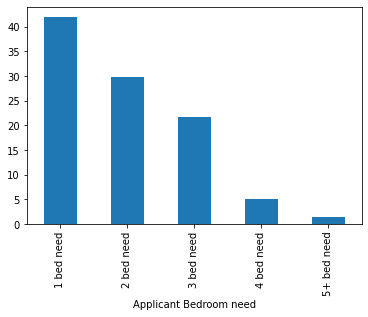

In [15]:
fig, ax1 = plt.subplots()
count['%'].plot(kind='bar',ax=ax1)